0
Writing data 0.0: 0.0
Measurement outputs : -11.2267
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0437
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.86069
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.67745
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.49461
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.31162
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.12876
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.94579
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement out

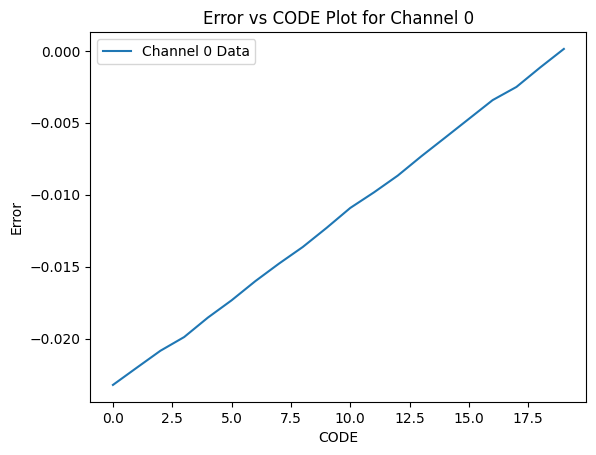

1
Writing data 0.0: 0.0
Measurement outputs : -11.242
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0584
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.87495
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.69128
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.50801
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.32452
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.14112
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.95773
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outp

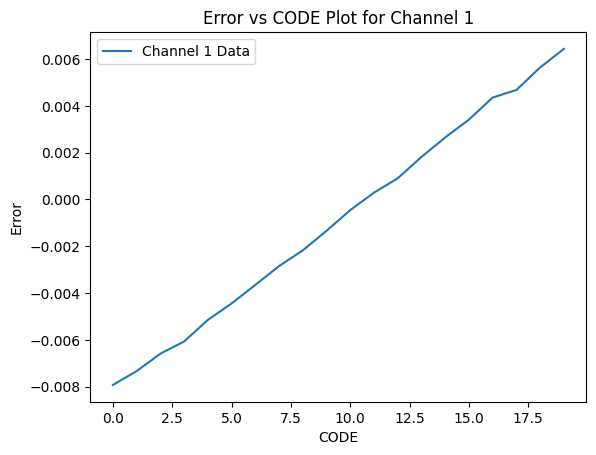

2
Writing data 0.0: 0.0
Measurement outputs : -11.2186
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0356
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.85273
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.66961
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.48685
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.30402
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.12124
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.93839
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement out

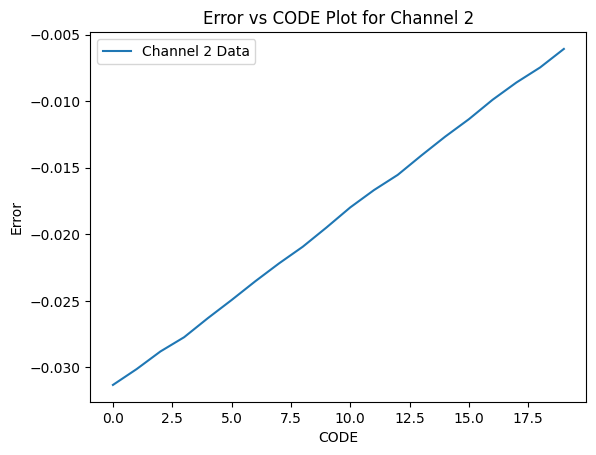

3
Writing data 0.0: 0.0
Measurement outputs : -11.2297
Expected Output : -11.249923706054688
Writing data 3449.2105263157896: 3449.2105263157896
Measurement outputs : -10.0465
Expected Output : -10.065731249357523
Writing data 6898.421052631579: 6898.421052631579
Measurement outputs : -8.86353
Expected Output : -8.881538792660361
Writing data 10347.631578947368: 10347.631578947368
Measurement outputs : -7.6802
Expected Output : -7.697346335963199
Writing data 13796.842105263158: 13796.842105263158
Measurement outputs : -6.49723
Expected Output : -6.513153879266036
Writing data 17246.052631578947: 17246.052631578947
Measurement outputs : -5.31424
Expected Output : -5.328961422568874
Writing data 20695.263157894737: 20695.263157894737
Measurement outputs : -4.13125
Expected Output : -4.144768965871711
Writing data 24144.473684210527: 24144.473684210527
Measurement outputs : -2.94823
Expected Output : -2.9605765091745475
Writing data 27593.684210526317: 27593.684210526317
Measurement outp

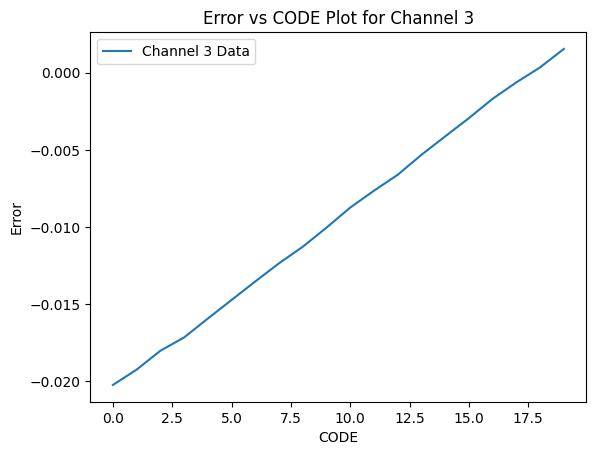


New DataFrame containing values of all four previous DataFrames:
            CODE  VOUT - EXPECTED  VOUT-RESULT     Error
0       0.000000       -11.249924    -11.22670 -0.023224
1    3449.210526       -10.065731    -10.04370 -0.022031
2    6898.421053        -8.881539     -8.86069 -0.020849
3   10347.631579        -7.697346     -7.67745 -0.019896
4   13796.842105        -6.513154     -6.49461 -0.018544
..           ...              ...          ...       ...
15  51738.157895         6.512963      6.51591 -0.002947
16  55187.368421         7.697156      7.69885 -0.001694
17  58636.578947         8.881348      8.88198 -0.000632
18  62085.789474        10.065541     10.06520  0.000341
19  65535.000000        11.249733     11.24820  0.001533

[80 rows x 4 columns]


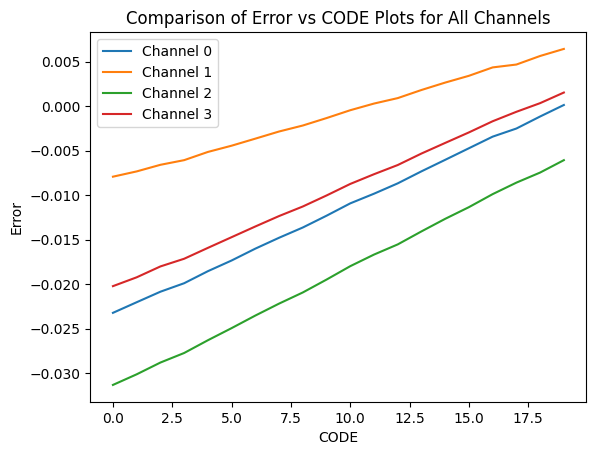

In [1]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

### all channels of PMU turnoff

for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})
p.decode_pmu_reg()

## SMU and PMU Setup

p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON
measure_delay = 0.5

p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3 # Thermal shutdown at 100°C
    })

p.decode_pmu_reg()

for ch in range(4):
    p.channels[ch].change_pmu_reg({

    "SS0"   : 0,
    "SF0"   : 0  #1,1

    })
p.decode_sys_ctrl()

import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store individual DataFrames
all_dataframes = []

# Add for loop for ch
for ch in range(4):
    print(ch)
  #  p.write_all_PMU_REGS(0x21fc60)
    
    #p.channels[ch].change_pmu_reg = 0x21fc60
    
    #Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "CH EN": 1,      # Channel enable
        "FORCE": 0,      # FV
        "C": 3,
        "MEAS": 3,       # VSens
        "SS0": 1,
        "SF0": 1,        # 1,1
        "FIN": 1
    })
        
    # Enable beeper and play chord
    k.beeper.enable = k.beeper.ON
    k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
    k.beeper.enable = k.beeper.OFF
    k.smua.source.output = k.smua.OUTPUT_ON
    p.channels[ch].write_dac(
            data=65534,
            dac_reg="FIN_U",
            reg="M"
        )

    data_list = []
    measure_points = np.linspace(0, 0xFFFF, 20)
    

    # Calculate the step size to generate 20 equidistant data points
   # step_size = 0xFFFF // 19

    # Loop to generate and write equidistant data points
    for d in  measure_points:
        # Calculate the data value for the current index
       # data = i * step_size

        # Print the data being written to the DAC register
        print(f"Writing data {d }: {(d)}")

        # Write the data to the DAC register
        p.channels[ch].write_dac(
            data=round(d),
            dac_reg="FIN_U",
            reg="X1"
        )

        # Perform measurement after writing to the DAC register
        sleep(measure_delay)

        iv_data = k.smua.measure.v()
        V_REF = 5

        # Print the measurement outputs
        print(f"Measurement outputs : {iv_data}")

        # Calculate expected output and error
      
        VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2**16))
        error = VOUT - iv_data
        print(f"Expected Output : {VOUT}")

        # Append data to the list
        data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

    # Create a DataFrame for the current channel
    data_df = pd.DataFrame(data_list)

    # Append the DataFrame to the list of all DataFrames
    all_dataframes.append(data_df)

    # Display the DataFrame
    print("\nData stored in DataFrame:")
    print(data_df)

    # Plot the data for the current channel
    plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

    # Add legend and labels
    plt.xlabel("CODE")
    plt.ylabel("Error")
    plt.title(f"Error vs CODE Plot for Channel {ch}")
    plt.legend()

    # Show the plot
    plt.show()
    k.smua.source.output = k.smua.OUTPUT_OFF
    p.channels[ch].change_pmu_reg({
        "CH EN": 0
        })



    

    # Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "SS0": 0,
        "SF0": 0,
    })
    
    sleep(measure_delay)
    

# Concatenate all individual DataFrames into a single DataFrame
all_data_df = pd.concat(all_dataframes)

# Display the new DataFrame
print("\nNew DataFrame containing values of all four previous DataFrames:")
print(all_data_df)

# Plot comparing all the other four plots
for df in all_dataframes:
    plt.plot(df.index, df["Error"], linestyle='-')

# Add legend and labels
plt.xlabel("CODE")
plt.ylabel("Error")
plt.title("Comparison of Error vs CODE Plots for All Channels")
plt.legend([f"Channel {i}" for i in range(4)])

# Show the plot

In [2]:
p.read_dac_regs(reg="M")


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,65535,65535,65535,65535,65535,21812,65535,65535,65535,65535
1,65535,65535,65535,65535,65535,21812,65535,65535,65535,65535
2,65535,65535,65535,65535,65535,21812,65535,65535,65535,65535
3,65535,65535,65535,65535,65535,21812,65535,65535,65535,65535


In [ ]:
p.channels[0].write_dac(
    data=0x0008,
    dac_reg="FIN_U",
    reg="X1"
)

In [8]:
for ch in range(4):
    print(ch)
    p.channels[ch].write_dac(
            data=0x65534,
            dac_reg="FIN_U",
            reg="M"
        )

0
1
2
3


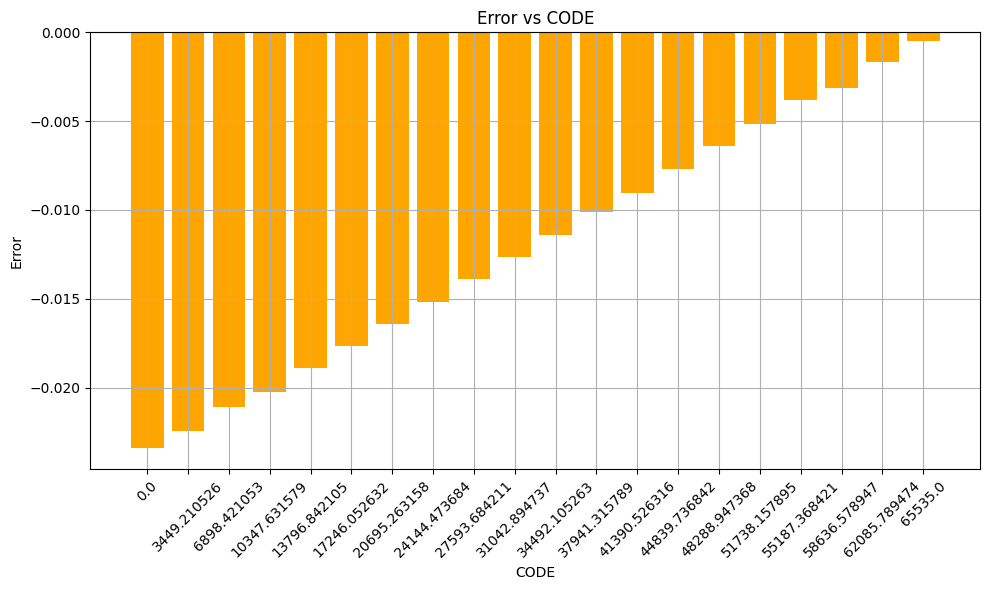

In [12]:

# ERROR for DELAY 2


import matplotlib.pyplot as plt

# Data from DataFrame 1
CODE = [
    0.000000, 3449.210526, 6898.421053, 10347.631579, 13796.842105,
    17246.052632, 20695.263158, 24144.473684, 27593.684211, 31042.894737,
    34492.105263, 37941.315789, 41390.526316, 44839.736842, 48288.947368,
    51738.157895, 55187.368421, 58636.578947, 62085.789474, 65535.000000
]

Error = [
    -0.023424, -0.022431, -0.021119, -0.020256, -0.018924, -0.017641,
    -0.016419, -0.015167, -0.013884, -0.012644, -0.011394, -0.010137,
    -0.009054, -0.007722, -0.006399, -0.005137, -0.003824, -0.003112,
    -0.001659, -0.000467
]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(CODE)), Error, color='orange')

# Set x-axis ticks and labels
plt.xticks(range(len(CODE)), CODE, rotation=45)

# Add labels and title
plt.xlabel('CODE')
plt.ylabel('Error')
plt.title('Error vs CODE')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


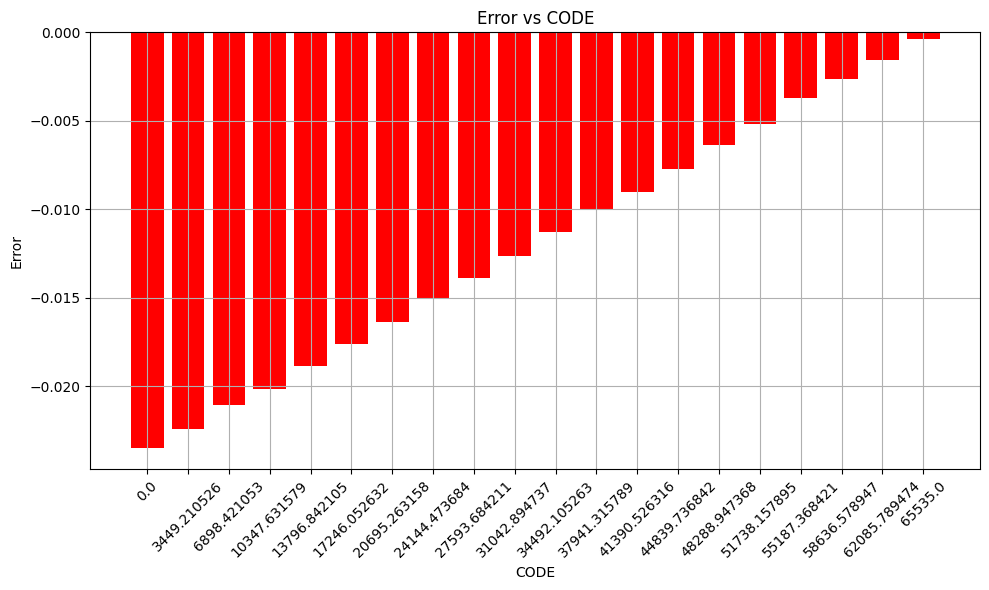

In [13]:
import matplotlib.pyplot as plt

# Data from DataFrame 1
CODE = [
    0.000000, 3449.210526, 6898.421053, 10347.631579, 13796.842105,
    17246.052632, 20695.263158, 24144.473684, 27593.684211, 31042.894737,
    34492.105263, 37941.315789, 41390.526316, 44839.736842, 48288.947368,
    51738.157895, 55187.368421, 58636.578947, 62085.789474, 65535.000000
]

Error = [
    -0.023524, -0.022431, -0.021049, -0.020166, -0.018884, -0.017631,
    -0.016389, -0.015027, -0.013884, -0.012654, -0.011312, -0.010057,
    -0.009024, -0.007732, -0.006379, -0.005157, -0.003714, -0.002642,
    -0.001559, -0.000367
]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(CODE)), Error, color='red')

# Set x-axis ticks and labels
plt.xticks(range(len(CODE)), CODE, rotation=45)

# Add labels and title
plt.xlabel('CODE')
plt.ylabel('Error')
plt.title('Error vs CODE')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
